<a href="https://colab.research.google.com/github/Euan-J-Austin/Analytics_and_Intelligence/blob/main/RemoteWorkerSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Pick variables
2. T-test loop
3. Transform the character variables into binary
4. Perform matching
5. Perform robustness check

# Pick variables



In [51]:
!pip install CausalInference

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from causalinference import CausalModel

In [53]:
df = pd.read_csv('/content/stackoverflow .csv')
df.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


## Diogo's first step was to remove all variables following career satisfaction to reduce dimensionality, also to get dummies for countries

In [54]:
df = pd.get_dummies(df, columns=['Remote'], prefix = '', drop_first = True)
df.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,...,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer,_Remote
0,United Kingdom,100000.000000,20,0,1,5000,8,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,United States,130000.000000,20,1,1,1000,9,0,0,0,...,1,1,0,0,0,0,1,0,1,1
2,United States,175000.000000,16,0,1,10000,7,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Germany,64516.129030,4,0,0,1000,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,India,6636.323594,1,0,1,5000,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
df = df.rename({'_Remote': 'Remote'}, axis = 'columns')
df.head(1)

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,...,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer,Remote
0,United Kingdom,100000.0,20,0,1,5000,8,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [56]:
df.groupby('Remote').mean()

<ipython-input-56-8fc164b0bb83>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Remote').mean()


,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
Remote,,,,,,,,,,,,,,,,,,,
0,70201.175042,7.142857,0.332736,0.760510,2187.325563,7.551106,0.071130,0.130106,0.286312,0.106993,0.121140,0.081092,0.027097,0.031680,0.032477,0.193465,0.035266,0.105997,0.718868
1,87400.737001,10.120000,0.443478,0.766957,1712.756522,7.855652,0.062609,0.180870,0.253913,0.107826,0.142609,0.064348,0.026087,0.033043,0.022609,0.220870,0.029565,0.139130,0.751304


In [57]:
#So far, I have loaded the libraries and data. I converted the categorical remote variable to a dummy variable so I could perform tests.

# T-Test loop

In [58]:
continuous = ['Salary', 'YearsCodedJob', 'CompanySizeNumber']
results = {}

for x in continuous:
  group_1 = df.where(df.Remote == 0).dropna()[x]
  group_2 = df.where(df.Remote == 1).dropna()[x]
  results[x] = ss.ttest_ind(group_1, group_2)

In [59]:
ttests = pd.DataFrame.from_dict(results, orient = "Index")
print(ttests)

                   statistic        pvalue
Salary             -9.849059  1.057708e-22
YearsCodedJob     -11.479414  3.637316e-30
CompanySizeNumber   2.872752  4.084448e-03


The difference between the means of remote and non-remote groups is statistically significant.

# Chi-squared test loop

In [60]:
df.head(1)

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,...,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer,Remote
0,United Kingdom,100000.0,20,0,1,5000,8,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [61]:
categorical = ["OpenSource", "Hobby"]

p = {}

for x in categorical:
    tab = pd.crosstab(index = df[x],
                    columns = df.Remote)
    stat, p[x], dof, exp = ss.chi2_contingency(tab)
chisquare = pd.DataFrame.from_dict(p, orient = "Index")
chisquare.columns = ["pvalue"]
print(chisquare) 

                  pvalue
OpenSource  1.535770e-07
Hobby       7.704515e-01


There exists a close relationship between non-/Remote and open source, hobby so the groups are not compatible

# Transforming the variables into binary

In [62]:
dimension = pd.get_dummies(df)
dimension.head(1)

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,Developer_with_stats_math_background,...,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer,Remote,Country_Canada,Country_Germany,Country_India,Country_United Kingdom,Country_United States
0,100000.0,20,0,1,5000,8,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Grouping North America, Europe and India standalone 

In [63]:
df.Country.value_counts()

United States     2791
United Kingdom    1023
Germany            757
India              538
Canada             485
Name: Country, dtype: int64

In [64]:
df['North_America'] = np.where((df.Country == 'United States') | (df.Country == 'Canada'), 1, 0)
df['Europe'] = np.where((df.Country == 'United Kingdom') | (df.Country ==  'Germany'), 1, 0)

In [65]:
df = df.drop(['Country'], axis = 1)

In [66]:
df.head(1)

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,Developer_with_stats_math_background,...,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer,Remote,North_America,Europe
0,100000.0,20,0,1,5000,8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [68]:
df['Data_Science'] = np.where((df.Machine_learning_specialist == 1) | (df.Data_scientist== 1), 1, 0)
df['Graphics'] = np.where((df.Graphic_designer == 1) | (df.Graphics_programming== 1), 1, 0)
df['Developer'] = np.where((df.Web_developer == 1) | (df.Mobile_developer== 1) | (df.Desktop_applications_developer== 1) | (df.DevOps == 1) | (df.Embedded_developer== 1), 1, 0)
df['Admin'] = np.where((df.Database_administrator == 1) | (df.Systems_administrator== 1), 1, 0)

df= df.drop(df.iloc[:, 6:19],axis = 1) #dropped QA to avoid dummy variable trap

In [72]:
df.head(1)

,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,CareerSatisfaction,Remote,North_America,Europe,Data_Science,Graphics,Developer,Admin
0,100000.0,20,0,1,5000,8,1,0,1,0,0,1,0


In [75]:
len(df.columns)

13

#Common Support Region?

A small treatment group, where possible, is useful for finding a CSR

In [76]:
treat = df.Remote.values
y = df.CareerSatisfaction.values
confounders = df.drop(columns = ['Remote', 'CareerSatisfaction']).values

In [77]:
import statsmodels.api as sm

In [78]:
confounders_csr = sm.add_constant(confounders)

In [79]:
csr_model = sm.Logit(treat, confounders_csr).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [81]:
probabilities = csr_model.predict(confounders_csr)
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob)
non_treated = df_prob[:,0] == 0 
treated = df_prob[:,0] == 1
treated = df_prob[treated, 1]

<ipython-input-82-0db0dc55e9f6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_treated, shade = True, color = 'red')
<ipython-input-82-0db0dc55e9f6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treated, shade = True, color = 'blue')


<Axes: ylabel='Density'>

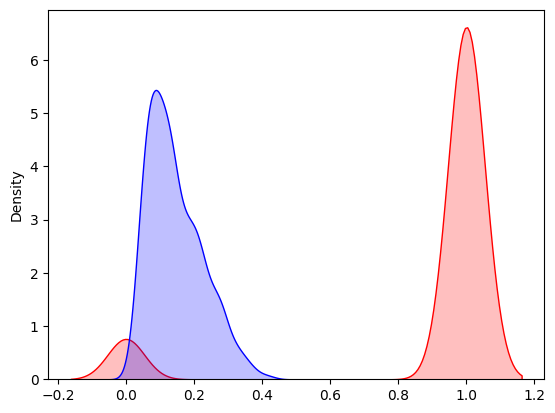

In [82]:
sns.kdeplot(non_treated, shade = True, color = 'red')
sns.kdeplot(treated, shade = True, color = 'blue')

In [83]:
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj = True)
print(model.estimates)

/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.136      0.132      1.027      0.304     -0.123      0.394
           ATC      0.135      0.138      0.975      0.329     -0.136      0.406
           ATT      0.142      0.143      0.995      0.320     -0.138      0.423



In [84]:
#ATT = those who did work remote, ATE = those who could have worked remote

In [ ]:
model.estimates['matching']['ate']
ate = {}
i = 0

while i < 1000:
  #sampling
  sample = df.sample(1000)
  #isolation of treat, y and confounders
  treat = sample.Remote.values
  y = sample.CareerSatisfaction.values
  confounders = sample.drop(columns = ['Remote', 
                                       'CareerSatisfaction']).values
  #matching model
  model = CausalModel(y, treat, confounders)
  model.est_via_matching(bias_adj = True)
  #store results
  ate[i] = model.estimates['matching']['ate']
  i += 1

Axes(0.125,0.11;0.775x0.77)
0.16007167054027285


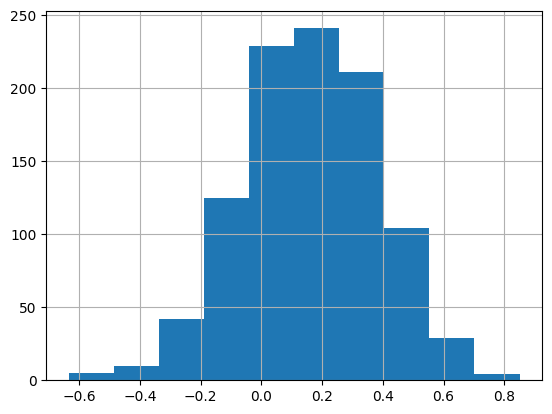

In [88]:
ate = pd.Series(ate)
print(ate.hist())
print(ate.mean())

In [89]:
#Robustness check -- removing 1 confounder
treat = sample.Remote.values
y = sample.CareerSatisfaction.values
confounders = sample.drop(columns = ['Remote', 
                                     'CareerSatisfaction',
                                     'Salary']).values
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj = True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.083      0.276      0.302      0.763     -0.457      0.624
           ATC      0.108      0.289      0.373      0.709     -0.458      0.673
           ATT     -0.115      0.302     -0.380      0.704     -0.708      0.478



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


In [ ]:
#doesn't look too robust, that's a drop from 16% mean ATE to 8% mean ATE
#further, statistical signifigance is greatly reduced